# matplotlib Examples Without Alt Text

To export this notebook as HTML uncomment and run the cell below:

In [1]:
#import os
#os.system('jupyter nbconvert --to html ./examples.ipynb')

In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Sunshine and Bikes in Seattle (Bar, Line, Pie and Radial charts)

In [3]:
# Data
bikes_over_fremont_bridge = np.array([112252.8, 103497.2, 136189.2, 165020.4, 231792, 221274.8,
                                      234421.6, 224087.2, 190238, 166078, 121548, 89695.6])
sunshine_hours = np.array([69, 108, 178, 207, 253, 268, 312, 281, 221, 142, 72, 52])
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Bar chart

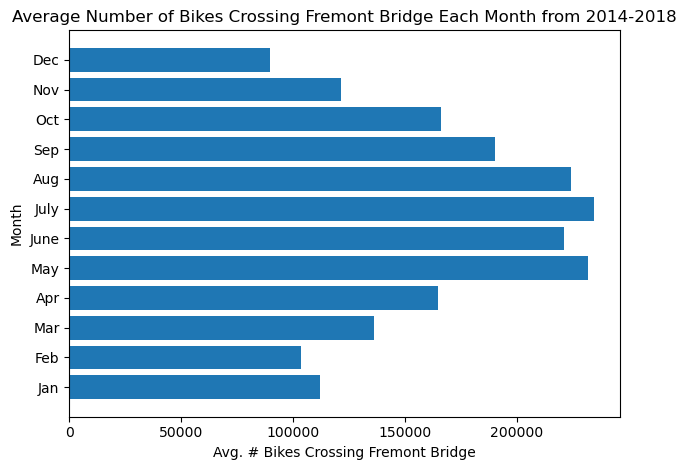

In [4]:
# (2) Bar chart
# Bike count averaged over 2014-2018 from the Freemont Bridge Bicycle Counter (https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
fig, ax = plt.subplots()
ax.set_title("Average Number of Bikes Crossing Fremont Bridge Each Month from 2014-2018")
ax.barh(list(range(12)), bikes_over_fremont_bridge)
ax.set_xlabel("Avg. # Bikes Crossing Fremont Bridge")
ax.set_ylabel("Month")
ax.set_yticks(ticks=list(range(0, 12)), labels=months)
plt.tight_layout()
plt.show()

### Line chart

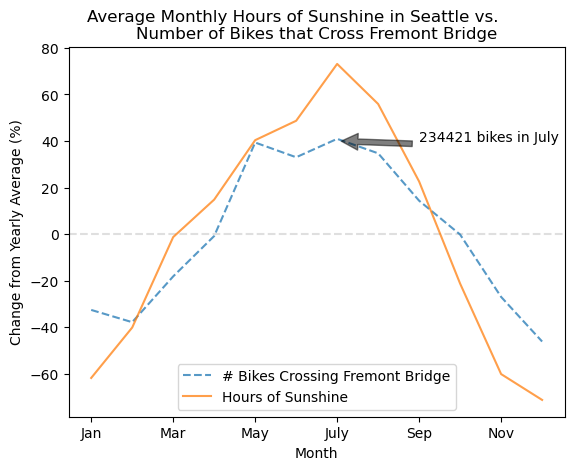

In [5]:
# (1) Line Chart
avg_bikes = np.mean(bikes_over_fremont_bridge)
avg_hours = np.mean(sunshine_hours)
normalized_bikes = 100 * (bikes_over_fremont_bridge - avg_bikes) / avg_bikes
normalized_sunshine = 100 * (sunshine_hours - avg_hours) / avg_hours

plt.title("Average Monthly Hours of Sunshine in Seattle vs. \
        \nNumber of Bikes that Cross Fremont Bridge")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.25)
plt.plot(normalized_bikes, ls="--", label="# Bikes Crossing Fremont Bridge", alpha=0.75)
plt.plot(normalized_sunshine, label="Hours of Sunshine", alpha=0.75)
plt.xticks(ticks=list(range(0, 11, 2)), labels=months[::2])
plt.xlabel("Month")
plt.ylabel("Change from Yearly Average (%)")
plt.annotate('234421 bikes in July', xy=(6, 40), xytext=(8, 40), arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))
plt.legend()
plt.show()

### Pie chart

Text(0.5, 1.0, 'Percentage of Annual Sunshine')

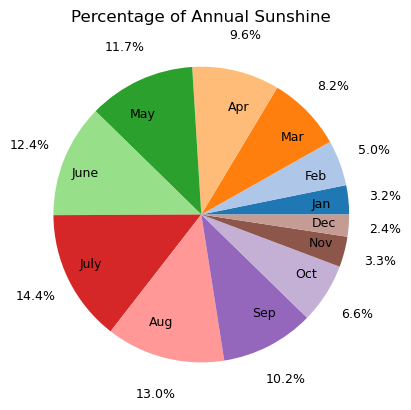

In [6]:
# (3) Pie chart
cmap = plt.cm.tab20
colors = cmap(list(range(12)))
plt.pie(sunshine_hours, labels=months, autopct='%1.1f%%', pctdistance=1.25,
                        labeldistance=0.75, colors=colors, textprops={'fontsize': 9})
plt.title("Percentage of Annual Sunshine")

### Radial line chart

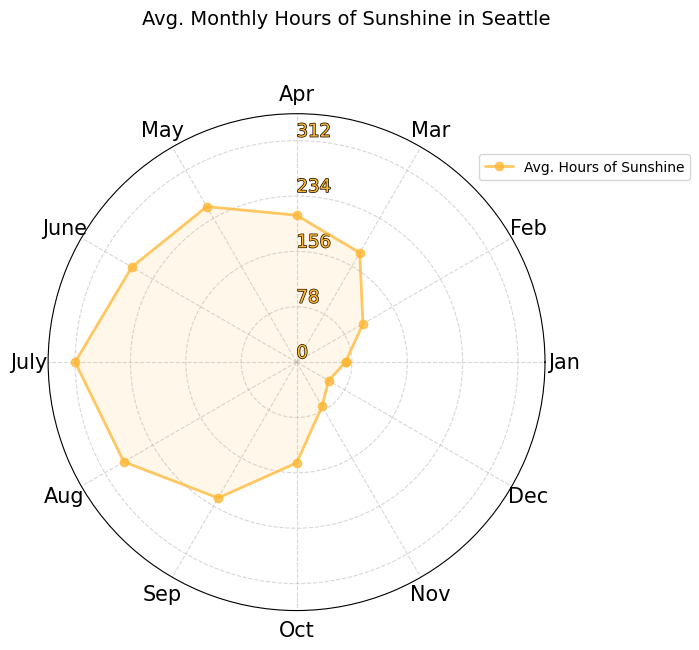

In [7]:
# (4) Radial line chart
from matplotlib import patheffects
from scipy.interpolate import pchip

SUN_COLOR = "#FFB631"

# Convert bike and sunshine stats into radial coordinates
monthnums = np.array(list(range(12)))
r = sunshine_hours
theta = (monthnums * np.pi) / 6
interp = pchip(theta, r)
tt = np.linspace(0, 2 * np.pi, 360)
r = list(sunshine_hours) + [sunshine_hours[0]]
theta = list(theta) + [theta[0]]
interptt = list(interp(tt)) + [interp(tt)[0]]
tt = list(tt) + [tt[0]]

# Start building matplotlib figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.suptitle("Avg. Monthly Hours of Sunshine in Seattle", fontsize=14)
# Configure twin axes
ax.set_rticks(np.linspace(0, np.amax(r), 5))  # Reduce the number of radial ticks
bike_labels = (np.linspace(0, np.amax(bikes_over_fremont_bridge), 5).astype(int) // 1000).astype(str)
bike_labels = [l + "K" for l in bike_labels]
bike_labels[0] = "0"
ax.set_rlabel_position(ax.get_rlabel_position())
ax.set_rlabel_position(90)
ax.tick_params(labelsize=13)
# Add outside month labels
ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))
ax.set_xticklabels(months, fontsize=15)
# Add dashed grid lines
ax.grid(True, alpha=0.5, linestyle="dashed")
ax.set_axisbelow(True)
plt.setp(ax.get_yticklabels(), color=SUN_COLOR)
ax.set_ylim([0, 350])

# Plot the radial lines and fills
ax.plot(theta, r, linewidth=2, color=SUN_COLOR, label='Avg. Hours of Sunshine',
        solid_capstyle='round', zorder=100, marker="o", alpha=0.75)
ax.fill_between(theta, r, facecolor=SUN_COLOR, alpha=0.1, zorder=99)
ax.legend(loc="lower left", bbox_to_anchor=(.5 + np.cos(np.pi / 4)/2, .5 + np.sin(np.pi / 4)/2))

# Add outlines for the tick labels to increase contrast
for tick in (ax.get_yticklabels()):
  tick.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
# Make sure ticks are drawn on top of lines and fills
ax.tick_params(zorder=200)
plt.gcf().set_size_inches(7, 7)
plt.tight_layout()
plt.show()

## 2d Gaussian example (scatter, strip, contour plots, and heatmaps)

In [8]:
# Data
blue_random_gaussian_2d = np.random.multivariate_normal([1, 2], [[4, -2], [-2, 3]], size=350)
orange_random_gaussian_2d = np.random.multivariate_normal([-4, 3], [[3, -1], [-1, 3]], size=250)

### Scatter plot

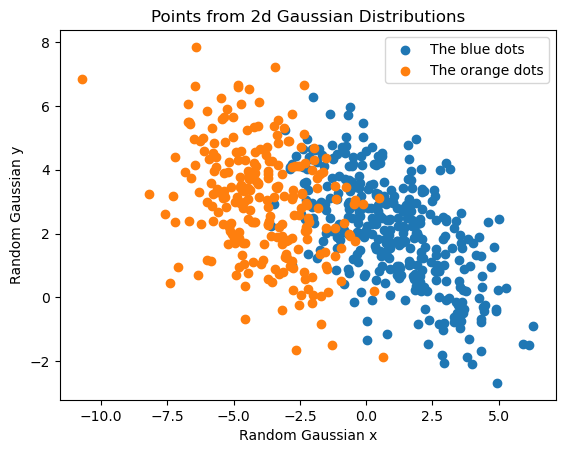

In [9]:
# (5) Scatterplot
plt.scatter(blue_random_gaussian_2d[:, 0], blue_random_gaussian_2d[:, 1], label="The blue dots")
plt.scatter(orange_random_gaussian_2d[:, 0], orange_random_gaussian_2d[:, 1], label="The orange dots")
plt.title("Points from 2d Gaussian Distributions")
plt.xlabel("Random Gaussian x")
plt.ylabel("Random Gaussian y")
plt.legend()

### Strip plot

Since strip plots are a subset of scatterplots, we manually pass chart_type="strip" as one of the parameters

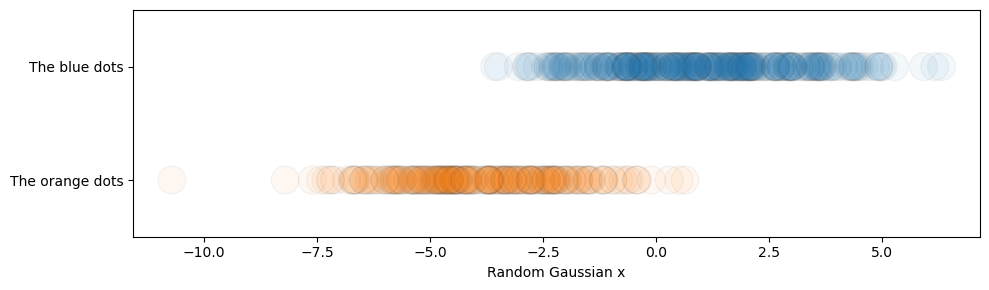

In [10]:
# (6) Strip plot
sns.stripplot([blue_random_gaussian_2d[:, 0], orange_random_gaussian_2d[:, 0]],
              jitter=False, size=20, linewidth=1, alpha=0.05, orient="h")
plt.gcf().set_size_inches(10, 3)
plt.xlabel("Random Gaussian x")
plt.yticks(ticks=[0, 1], labels=["The blue dots", "The orange dots"])
plt.tight_layout()
plt.show()

### Heatmap

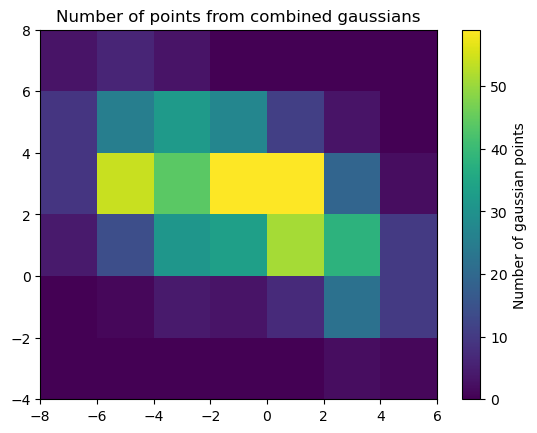

In [11]:
# (7) Heatmap
combined_points = np.concatenate((blue_random_gaussian_2d, orange_random_gaussian_2d))
plt.hist2d(combined_points[:, 0], combined_points[:, 1], bins=(range(-8, 8, 2), range(-4, 10, 2)))
plt.title('Number of points from combined gaussians')
plt.colorbar(label="Number of gaussian points")

### Contour plot

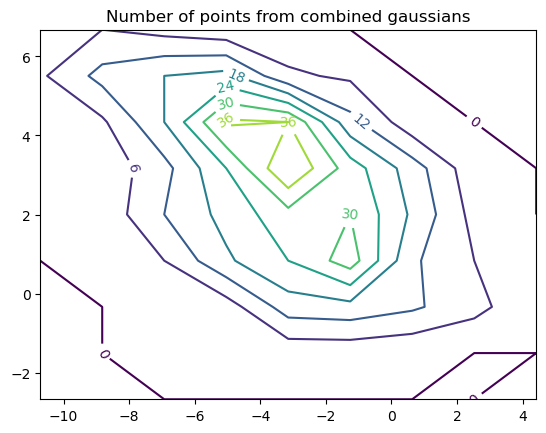

In [12]:
# (8) Contour plot
hist_bins, xbins, ybins = np.histogram2d(combined_points[:, 0], combined_points[:, 1], bins=9)
X, Y = np.meshgrid(xbins[:-1], ybins[:-1])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, hist_bins)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Number of points from combined gaussians')
plt.show()

## Anscombe's quartet (multiple Subplots, boxplot)


### Multiple subplots

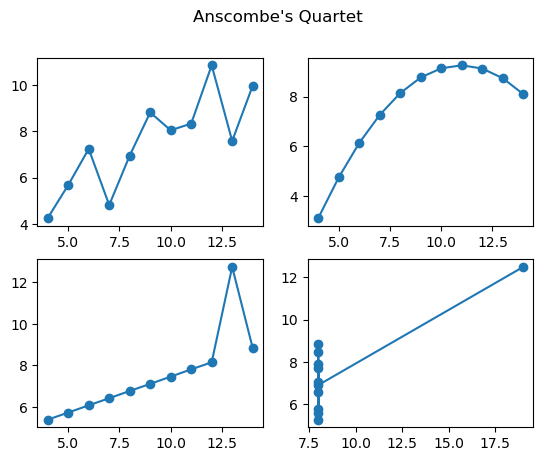

In [15]:
# (9) Multiple Subplots
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50])
x_order = np.argsort(x)

fig, axs = plt.subplots(2, 2)
fig.suptitle("Anscombe's Quartet")
axs[0][0].plot(x[x_order], y1[x_order], "-o")
axs[0][1].plot(x[x_order], y2[x_order], "-o")
axs[1][0].plot(x[x_order], y3[x_order], "-o")
axs[1][1].plot(x4, y4, "-o")
plt.show()

### Box plot

Text(0.5, 1.0, "Distributional differences in Anscombe's quartet")

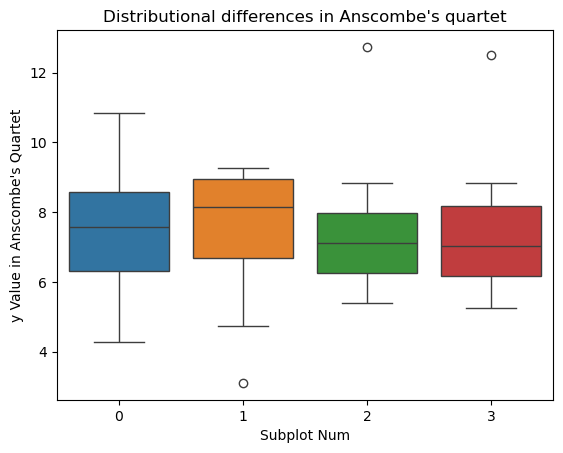

In [16]:
# (10) Boxplot
bp = sns.boxplot([y1, y2, y3, y4])
plt.ylabel("y Value in Anscombe's Quartet")
plt.xlabel("Subplot Num")
plt.title("Distributional differences in Anscombe's quartet")